In [8]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import os
import webbrowser

In [9]:
app_data=pd.read_csv('Play Store Data.csv')
reviews=pd.read_csv('User Reviews.csv')

In [10]:
app_data.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [11]:
reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [12]:
app_data=app_data.dropna(subset=['Rating'])
for column in app_data.columns:
    app_data[column].fillna(app_data[column].mode()[0],inplace=True)
app_data.drop_duplicates(inplace=True)
app_data=app_data[app_data['Rating']<=5]
reviews.dropna(subset=['Translated_Review'], inplace=True)

C:\Users\91797\AppData\Local\Temp\ipykernel_26996\1508809543.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  app_data[column].fillna(app_data[column].mode()[0],inplace=True)


In [13]:
app_data['Installs']=app_data['Installs'].str.replace('+','').str.replace(',','').astype(int)

app_data['Price']=app_data['Price'].str.replace('$','').astype(float)

In [14]:
merged_df=pd.merge(reviews,app_data, on='App', how='inner')
merged_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
3,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
4,10 Best Foods for You,Best way,Positive,1.000000,0.300000,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59119,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667,LIFESTYLE,4.1,28301,Varies with device,1000000,Free,0.0,Everyone,Lifestyle,"July 13, 2018",12.1.0,4.1 and up
59120,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222,LIFESTYLE,4.1,28301,Varies with device,1000000,Free,0.0,Everyone,Lifestyle,"July 13, 2018",12.1.0,4.1 and up
59121,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000,LIFESTYLE,4.1,28301,Varies with device,1000000,Free,0.0,Everyone,Lifestyle,"July 13, 2018",12.1.0,4.1 and up
59122,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000,LIFESTYLE,4.1,28301,Varies with device,1000000,Free,0.0,Everyone,Lifestyle,"July 13, 2018",12.1.0,4.1 and up


In [15]:
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M',''))
    elif 'k' in size:
        return float(size.replace('k',''))/1024
    else:
        return np.nan
    
app_data['Size']=app_data['Size'].apply(convert_size)

In [16]:
app_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [17]:
app_data['Reviews']=app_data['Reviews'].astype(int)

In [18]:
app_data['Log_installs']=np.log1p(app_data['Installs'])
app_data['Reviews']=np.log1p(app_data['Reviews'])

In [19]:
def rating_group(rating):
    if rating>=4:
        return 'top rated app'
    elif rating>=3:
        return 'above average app'
    elif rating >=2:
        return 'average app'
    else:
        return 'below average app'
app_data['Rating Group']=app_data['Rating'].apply(rating_group)

In [20]:
app_data['Revenue']=app_data['Price']*app_data['Installs']

In [21]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\91797\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [22]:
sia=SentimentIntensityAnalyzer()

In [23]:
review='I love this app it has amazing features and easy to use'
sia.polarity_scores(review)


{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.8979}

In [24]:
review='I hate this app and its not convenient to use'
sia.polarity_scores(review)

{'neg': 0.316, 'neu': 0.684, 'pos': 0.0, 'compound': -0.5719}

In [25]:
reviews['sentiment score']=reviews['Translated_Review'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [26]:
reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,sentiment score
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333,0.9531
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462,0.6597
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000,0.6249
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000,0.6369
5,10 Best Foods for You,Best way,Positive,1.00,0.300000,0.6369


In [27]:
app_data['Last Updated']= pd.to_datetime(app_data['Last Updated'], errors='coerce')

In [28]:
app_data['year']=app_data['Last Updated'].dt.year
app_data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Log_installs,Rating Group,Revenue,year
10834,FR Calculator,FAMILY,4.0,2.079442,2.6,500,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 and up,6.216606,top rated app,0.0,2017
10836,Sya9a Maroc - FR,FAMILY,4.5,3.663562,53.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,8.517393,top rated app,0.0,2017
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,1.609438,3.6,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,4.615121,top rated app,0.0,2018
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,4.744932,NaN,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,6.908755,top rated app,0.0,2015
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,12.894981,19.0,10000000,Free,0.0,Everyone,Lifestyle,2018-07-25,Varies with device,Varies with device,16.118096,top rated app,0.0,2018


In [29]:
html_files_path="./"
if not os.path.exists(html_files_path):
    os.makedirs(html_files_path)

In [30]:
plot_containers=""

In [31]:
import plotly.io as pio

def save_plot_as_html(fig, filename, insight):
    global plot_containers
    filepath = os.path.join(html_files_path, filename)
    html_content = pio.to_html(fig, full_html=False, include_plotlyjs='inline')
    # Append the plot and its insight to plot_containers
    plot_containers += f"""
    <div class="plot-container" id="{filename}" onclick="openPlot('{filename}')">
        <div class="plot">{html_content}</div>
        <div class="insights">{insight}</div>
    </div>
    """
    fig.write_html(filepath, full_html=False, include_plotlyjs='inline')

In [32]:
plot_width=400
plot_height=300
plot_bg_color='black'
text_color='white'
title_font={'size':16}
axis_font={'size':14}



In [33]:
category_counts=app_data['Category'].value_counts().nlargest(10)
fig1=px.bar(category_counts, 
           x=category_counts.index, 
           y=category_counts.values,
             labels=['x:category','y:counts'],
             title='Top 10 Categories by Count', 
             color=category_counts.index ,
            color_discrete_sequence=px.colors.sequential.Plasma,
            width=800,
            height=600
)
fig1.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size': 16},
    xaxis=dict(title_font={'size': 12}),
    yaxis=dict(title_font={'size': 12}),
    margin=dict(l=10, r=10, t=30, b=10)
)
fig1.update_traces(marker=dict(line=dict(width=1, color='white')))
save_plot_as_html(fig1, 'top_10_categories_by_count.html', 'Top categories are dominated by tools, entertainment, and education')


In [34]:
type_counts=app_data['Type'].value_counts()
fig2=px.pie(type_counts, 
          values=type_counts.values,
            names=type_counts.index,
             title='App Types Distribution', 
            color_discrete_sequence=px.colors.sequential.RdBu,
            width=800,
            height=600
)
fig2.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size': 16},
    margin=dict(l=10, r=10, t=30, b=10)
)
fig2.update_traces(marker=dict(line=dict(width=1, color='white')))
save_plot_as_html(fig2, 'type graph 2.html', 'Most apps on the playstore are free , indicating a strategy to monetize through ads or in-app purchases')


In [35]:
fig3=px.histogram(app_data, 
           x=['Rating'], 
           nbins=20,
             title='Rating distribution', 
            color_discrete_sequence=['#636efa'],
            width=800,
            height=600
)
fig3.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size': 16},
    xaxis=dict(title_font={'size': 12}),
    yaxis=dict(title_font={'size': 12}),
    margin=dict(l=10, r=10, t=30, b=10)
)
fig3.update_traces(marker=dict(line=dict(width=1, color='white')))
save_plot_as_html(fig3, 'rating graph 3.html', 'ratings are skewed towards the higher end, indicating that most apps are well received by users')


In [36]:
sentiment_counts=reviews['sentiment score'].value_counts()
fig4=px.bar(sentiment_counts, 
           x=sentiment_counts.index, 
           y=sentiment_counts.values,
             labels=['x:sentiment','y:counts'],
             title='sentiment distribution', 
             color=sentiment_counts.index ,
            color_discrete_sequence=px.colors.sequential.RdPu,
            width=800,
            height=600
)
fig4.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size': 16},
    xaxis=dict(title_font={'size': 12}),
    yaxis=dict(title_font={'size': 12}),
    margin=dict(l=10, r=10, t=30, b=10)
)
fig4.update_traces(marker=dict(line=dict(width=1, color='white')))
save_plot_as_html(fig4, 'sentiment graph 4.html', 'sentimenst in review show a mix of positive and negative reviews , slightly inclined towards positive')


In [37]:
installs_by_category = app_data.groupby('Category')['Installs'].sum().nlargest(10)
fig5 = px.bar(installs_by_category, 
              x=installs_by_category.index, 
              y=installs_by_category.values,
              orientation='h',
              labels={'x': 'Category', 'y': 'Installs'},
              title='Installs By Category', 
              color=installs_by_category.index,
              color_discrete_sequence=px.colors.sequential.Blues,
              width=800,
              height=600
)
fig5.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size': 16},
    xaxis=dict(title_font={'size': 12}),
    yaxis=dict(title_font={'size': 12}),
    margin=dict(l=10, r=10, t=30, b=10)
)
fig5.update_traces(marker=dict(line=dict(width=1, color='white')))
save_plot_as_html(fig5, 'installs_by_category.html', "The categories with the most installs are social and communication apps, reflecting their broad appeal and daily usage.")

In [38]:
updates_per_year = app_data.groupby(app_data['Last Updated'].dt.year).size().sort_index()
fig6 = px.line(updates_per_year, 
              x=updates_per_year.index, 
              y=updates_per_year.values,
              labels={'x': 'Year', 'y': 'Number of Updates'},
              title='Number of Updates Over the Years', 
              color_discrete_sequence=['#AB63FA'],
              width=plot_width,
              height=plot_height
)
fig6.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color=text_color,
    title_font=title_font,
    xaxis=dict(title_font=axis_font),
    yaxis=dict(title_font=axis_font),
    margin=dict(l=10, r=10, t=30, b=10)
)
fig6.update_traces(marker=dict(line=dict(width=1, color='white')))
save_plot_as_html(fig6, 'updates_over_the_year.html', "Updates are increasing over the years, indicating that developers are actively maintaining their apps.")

In [39]:
revenue_by_category = app_data.groupby('Category')['Revenue'].sum().nlargest(10)
fig7 = px.bar(revenue_by_category, 
              x=revenue_by_category.index, 
              y=revenue_by_category.values,
              labels={'x': 'Category', 'y': 'revenue'},
              title='Revenue By Category', 
              color=revenue_by_category.index,
              color_discrete_sequence=px.colors.sequential.Greens,
              width=800,
              height=600
)
fig7.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size': 16},
    xaxis=dict(title_font={'size': 12}),
    yaxis=dict(title_font={'size': 12}),
    margin=dict(l=10, r=10, t=30, b=10)
)
fig7.update_traces(marker=dict(line=dict(width=1, color='white')))
save_plot_as_html(fig7, 'revenue_by_category.html', "categories such as buisness and productivity lead in revenue generation, indicating that users are willing to pay for apps that help them in their work.")

In [40]:
genre_counts = app_data['Genres'].str.split(';',expand=True).stack().value_counts().nlargest(10)
fig8 = px.bar(genre_counts, 
              x=genre_counts.index, 
              y=genre_counts.values,
              labels={'x': 'Genre', 'y': 'Counts'},
              title='top genres', 
              color=genre_counts.index,
              color_discrete_sequence=px.colors.sequential.OrRd,
              width=800,
              height=600
)
fig8.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size': 16},
    xaxis=dict(title_font={'size': 12}),
    yaxis=dict(title_font={'size': 12}),
    margin=dict(l=10, r=10, t=30, b=10)
)
fig8.update_traces(marker=dict(line=dict(width=1, color='white')))
save_plot_as_html(fig8, 'genre counts.html', "actions and casuals genres are the most common ,reflecting users' preferences for engaging and easy to play games.")

In [41]:
fig9 = px.scatter(app_data, 
              x='Last Updated',
              y='Rating',
              color='Type' ,
              title='Impact of last update on rating',             
              color_discrete_sequence=px.colors.qualitative.Vivid,
              width=800,
              height=600
)
fig9.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size': 16},
    xaxis=dict(title_font={'size': 12}),
    yaxis=dict(title_font={'size': 12}),
    margin=dict(l=10, r=10, t=30, b=10)
)
fig9.update_traces(marker=dict(line=dict(width=1, color='white')))
save_plot_as_html(fig9, 'last update impact.html', "the scatter plot shows a weak correlation between the last update and the rating of the app , suggesting that more frequent updates do not necessarily lead to higher ratings.")

In [42]:
fig10 = px.box(app_data, 
              x='Type',
              y='Rating',
              color='Type' ,
              title='Rating for paid and free apps',             
              color_discrete_sequence=px.colors.qualitative.Pastel,
              width=800,
              height=600
)
fig10.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font_color='white',
    title_font={'size': 16},
    xaxis=dict(title_font={'size': 12}),
    yaxis=dict(title_font={'size': 12}),
    margin=dict(l=10, r=10, t=30, b=10)
)
fig10.update_traces(marker=dict(line=dict(width=1, color='white')))
save_plot_as_html(fig10, 'paid free graph 10.html', "paid apps have a higher median rating than free apps, indicating that users expect hugher quality from apps they pay for .")

In [43]:
plot_containers_split=plot_containers.split('</div>')

In [44]:
if len (plot_containers_split)>1:
    final_plot=plot_containers_split[-2]+'</div>'
else:
    final_plot=plot_containers

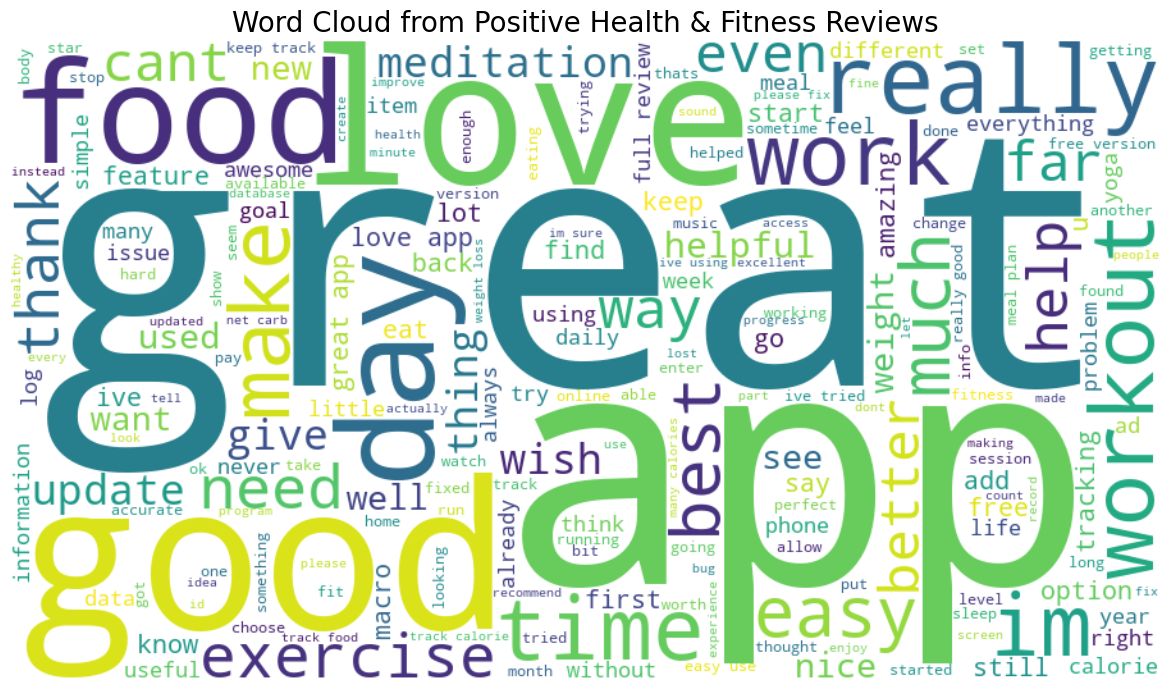

In [45]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords


apps_df = pd.read_csv('Play Store Data.csv')
reviews_df = pd.read_csv('User Reviews.csv')


health_apps = apps_df[apps_df['Category'] == 'HEALTH_AND_FITNESS']['App'].dropna().unique()
filtered_reviews = reviews_df[
    (reviews_df['App'].isin(health_apps)) & 
    (reviews_df['Sentiment'] == 'Positive')
].dropna(subset=['Translated_Review'])


app_names = list(health_apps)
def clean_text(text):
    if pd.isnull(text): return ''
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    for app in app_names:
        app_clean = re.sub(r'[^a-z\s]', '', app.lower())
        text = text.replace(app_clean, '')
    return text.strip()

filtered_reviews['cleaned_review'] = filtered_reviews['Translated_Review'].apply(clean_text)
all_text = ' '.join(filtered_reviews['cleaned_review'].tolist())
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in all_text.split() if word not in stop_words]
final_text = ' '.join(filtered_words)

wordcloud = WordCloud(width=900, height=500, background_color='white').generate(final_text)


plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud from Positive Health & Fitness Reviews", fontsize=20)
plt.tight_layout()

#
plt.savefig("wordcloud.png")

wordcloud_plot_html = f"""
<div class="plot-container" onclick="openPlot('wordcloud.png')" style="width: 450px; height: 300px;">
    <img src="wordcloud.png" alt="Word Cloud" style="width: 100%; height: 100%; object-fit: contain;" />
    <div class="insights">
        Word Cloud of Positive Reviews for Health & Fitness apps shows common sentiments like 'great', 'love', and 'easy'.
    </div>
</div>
"""


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from datetime import datetime
import pytz


apps_df = pd.read_csv("Play Store Data.csv")


apps_df.dropna(subset=['Installs', 'Price', 'Android Ver', 'Size', 'Content Rating', 'App', 'Category', 'Type'], inplace=True)
apps_df['Installs'] = apps_df['Installs'].str.replace(r'[+,]', '', regex=True).astype(int)
apps_df['Price'] = apps_df['Price'].str.replace('$', '').astype(float)



apps_df = apps_df[apps_df['Installs'] >= 10000]
apps_df['Revenue'] = apps_df['Installs'] * apps_df['Price']
apps_df = apps_df[apps_df['Revenue'] >= 10000]
apps_df = apps_df[apps_df['Android Ver'].str.extract(r'(\d+\.\d+)').astype(float)[0] > 4.0]
apps_df = apps_df[apps_df['Size'].str.endswith('M')]
apps_df['Size'] = apps_df['Size'].str.replace('M', '').astype(float)
apps_df = apps_df[apps_df['Size'] > 15]
apps_df = apps_df[apps_df['Content Rating'] == 'Everyone']
apps_df = apps_df[apps_df['App'].apply(lambda x: len(x) <= 30)]


top_categories = apps_df['Category'].value_counts().nlargest(3).index.tolist()
filtered_df = apps_df[apps_df['Category'].isin(top_categories)]


agg_df = filtered_df.groupby(['Category', 'Type']).agg({
    'Installs': 'mean',
    'Revenue': 'mean'
}).reset_index()


ist = pytz.timezone('Asia/Kolkata')
now_ist = datetime.now(ist)

if 13 <= now_ist.hour < 14:
    fig11 = go.Figure()

    for app_type in agg_df['Type'].unique():
        df_type = agg_df[agg_df['Type'] == app_type]
        
    
        fig11.add_trace(go.Bar(
            x=df_type['Category'],
            y=df_type['Installs'],
            name=f'Installs - {app_type}',
            yaxis='y1'
        ))

    
        fig11.add_trace(go.Scatter(
            x=df_type['Category'],
            y=df_type['Revenue'],
            name=f'Revenue - {app_type}',
            yaxis='y2',
            mode='lines+markers'
        ))

    
    fig11.update_layout(
        title="Average Installs vs Revenue for Free vs Paid Apps in Top 3 Categories",
        xaxis=dict(title='Category'),
        yaxis=dict(title='Average Installs', side='left'),
        yaxis2=dict(title='Average Revenue ($)', overlaying='y', side='right'),
        legend=dict(x=1.05),
        width=1000,
        height=600
    )
    fig11.update_traces(marker=dict(line=dict(width=1, color='white')))
    save_plot_as_html(fig11, 'Dual axis plot.html', "Average Installs vs Revenue for Free vs Paid Apps in Top 3 Categories")
else:
    print("This chart is only visible between 1 PM and 2 PM IST.")


This chart is only visible between 1 PM and 2 PM IST.


In [47]:
import pandas as pd
import plotly.express as px
from datetime import datetime
import pytz


apps_df = pd.read_csv('Play Store Data.csv')
reviews_df = pd.read_csv('User Reviews.csv')

apps_df = apps_df[apps_df['Installs'].str.contains(r'^\d+[+,]?', regex=True, na=False)]

apps_df['Installs'] = apps_df['Installs'].str.replace('[+,]', '', regex=True).astype(int)
apps_df['Reviews'] = apps_df['Reviews'].astype(int)
apps_df = apps_df[apps_df['Size'].str.endswith('M')]
apps_df['Size_MB'] = apps_df['Size'].str.replace('M', '').astype(float)


filtered_apps = apps_df[
    (apps_df['Rating'] > 3.5) &
    (apps_df['Reviews'] > 500) &
    (apps_df['Installs'] > 50000) &
    (apps_df['Category'].isin(['GAME', 'BEAUTY', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'ENTERTAINMENT', 'SOCIAL', 'EVENT']))
]


reviews_df = reviews_df.dropna(subset=['Translated_Review'])
reviews_df = reviews_df[reviews_df['Sentiment_Subjectivity'] > 0.5]


merged_df = pd.merge(filtered_apps, reviews_df, on='App')


merged_df = merged_df.dropna(subset=['Rating', 'Size_MB'])

ist = pytz.timezone('Asia/Kolkata')
now_ist = datetime.now(ist)
if 17 <= now_ist.hour < 19:
    fig12 = px.scatter(
        merged_df,
        x='Size',
        y='Rating',
        size='Installs',
        color='Category',
        hover_name='App',
        size_max=60,
        title='Bubble Chart: App Size vs Rating (Bubble = Installs)',
        labels={'Size': 'App Size (MB)', 'Rating': 'Average Rating'}
    )
    fig12.update_layout(
        title_font_size=20,
        plot_bgcolor='white',
        xaxis=dict(title='App Size (MB)', gridcolor='lightgrey'),
        yaxis=dict(title='Average Rating', gridcolor='lightgrey')
    )
    
    fig12.update_traces(marker=dict(line=dict(width=1, color='black')))
    save_plot_as_html(fig12, 'Bubble chart.html', "Bubble chart shows the relationship between app size and rating, with bubble size indicating the number of installs.")
else:
    print("This chart is only available between 5 PM and 7 PM IST.")


This chart is only available between 5 PM and 7 PM IST.


In [48]:
dashboard_html= """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name=viewport" content="width=device-width,initial-scale-1.0">
    <title> Google Play Store Review Analytics</title>
    <style>
        body {{
            font-family: Arial, sans-serif;
            background-color: #333;
            color: #fff;
            margin: 0;
            padding: 0;
        }}
        .header {{
            display: flex;
            align-items: center;
            justify-content: center;
            padding: 20px;
            background-color: #444
        }}
        .header img {{
            margin: 0 10px;
            height: 50px;
        }}
        .container {{
            display: flex;
            flex-wrap: wrap;
            justify_content: center;
            padding: 20px;
        }}
        .plot-container {{
            border: 2px solid #555
            margin: 10px;
            padding: 10px;
            width: {plot_width}px;
            height: {plot_height}px;
            overflow: hidden;
            position: relative;
            cursor: pointer;
        }}
        .insights {{
            display: none;
            position: absolute;
            right: 10px;
            top: 10px;
            background-color: rgba(0,0,0,0.7);
            padding: 5px;
            border-radius: 5px;
            color: #fff;
        }}
        .plot-container: hover .insights {{
            display: block;
        }}
        </style>
        <script>
            function openPlot(filename) {{
                window.open(filename, '_blank');
                }}
        </script>
    </head>
    <body>
        <div class= "header">
            <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4a/Logo_2013_Google.png/800px-Logo_2013_Google.png" alt="Google Logo">
            <h1>Google Play Store Reviews Analytics</h1>
            <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Google_Play_Store_badge_EN.svg/1024px-Google_Play_Store_badge_EN.svg.png" alt="Google Play Store Logo">
        </div>
        <div class="container">
            {plots}
        </div>
    </body>
    </html>
    """

In [53]:
plots=plot_containers+wordcloud_plot_html
final_html=dashboard_html.format(plots=plots,plot_width=plot_width,plot_height=plot_height)

In [54]:
dashboard_path=os.path.join(html_files_path,'web page.html')


In [55]:

with open(dashboard_path,"w", encoding="utf-8") as f:
    f.write(final_html)

In [56]:
webbrowser.open("file://"+os.path.realpath(dashboard_path))

True